# Predicting AstraZeneca Stock Prices
### Melania Czobit


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

     |████████████████████████████████| 6.3MB 17.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.61-py2.py3-none-any.whl size=23818 sha256=6d7eb903c14ce5417a751b228e110c1014261fd4b9b62e776a7c43d62a33ddd8
  Stored in directory: /root/.cache/pip/wheels/9c/b3/31/b5f2bcf2e3fd3f42e5ca1a3d20ada27eae8cbda7de75a5a2a0
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


**Importing stock data**

The AZN stock price data will be obtained from Yahoo finance. 

In [3]:
df = yf.download('AZN','2012-12-31','2020-01-01')

[*********************100%***********************]  1 of 1 completed


**Data Preparation**

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,23.375000,23.660000,23.360001,23.635000,16.594944,1916600
2013-01-02,24.080000,24.120001,23.980000,24.120001,16.935476,2812000
2013-01-03,24.020000,24.115000,23.980000,24.075001,16.903885,1941200
2013-01-04,23.959999,24.120001,23.959999,24.075001,16.903885,1854800
2013-01-07,23.995001,24.100000,23.975000,24.055000,16.889841,1932200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1763 entries, 2012-12-31 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1763 non-null   float64
 1   High       1763 non-null   float64
 2   Low        1763 non-null   float64
 3   Close      1763 non-null   float64
 4   Adj Close  1763 non-null   float64
 5   Volume     1763 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.4 KB


The dataset is missing a few days - weekends and holidays are not in the dataset. These values will be added into the dataset by backfilling. 

In [4]:
df = df.resample('D').bfill()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,23.375000,23.660000,23.360001,23.635000,16.594944,1916600
2013-01-01,24.080000,24.120001,23.980000,24.120001,16.935476,2812000
2013-01-02,24.080000,24.120001,23.980000,24.120001,16.935476,2812000
2013-01-03,24.020000,24.115000,23.980000,24.075001,16.903885,1941200
2013-01-04,23.959999,24.120001,23.959999,24.075001,16.903885,1854800
...,...,...,...,...,...,...
2019-12-27,50.570000,50.660000,50.299999,50.439999,48.110725,1636200
2019-12-28,50.830002,50.840000,49.810001,50.009998,47.700581,1960300
2019-12-29,50.830002,50.840000,49.810001,50.009998,47.700581,1960300


The first row, with date 2012-12-31, will be omitted. It was required to backfill the row for 2013-01-01. 

In [5]:
df = df.iloc[1:]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,24.080000,24.120001,23.980000,24.120001,16.935476,2812000
2013-01-02,24.080000,24.120001,23.980000,24.120001,16.935476,2812000
2013-01-03,24.020000,24.115000,23.980000,24.075001,16.903885,1941200
2013-01-04,23.959999,24.120001,23.959999,24.075001,16.903885,1854800
2013-01-05,23.995001,24.100000,23.975000,24.055000,16.889841,1932200
...,...,...,...,...,...,...
2019-12-27,50.570000,50.660000,50.299999,50.439999,48.110725,1636200
2019-12-28,50.830002,50.840000,49.810001,50.009998,47.700581,1960300
2019-12-29,50.830002,50.840000,49.810001,50.009998,47.700581,1960300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2556 entries, 2013-01-01 to 2019-12-31
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2556 non-null   float64
 1   High       2556 non-null   float64
 2   Low        2556 non-null   float64
 3   Close      2556 non-null   float64
 4   Adj Close  2556 non-null   float64
 5   Volume     2556 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 139.8 KB


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,24.080000,24.120001,23.980000,24.120001,16.935476,2812000
2013-01-02,24.080000,24.120001,23.980000,24.120001,16.935476,2812000
2013-01-03,24.020000,24.115000,23.980000,24.075001,16.903885,1941200
2013-01-04,23.959999,24.120001,23.959999,24.075001,16.903885,1854800
2013-01-05,23.995001,24.100000,23.975000,24.055000,16.889841,1932200


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2.556000e+03
mean,33.604810,33.817005,33.396299,33.609597,28.449691,4.351601e+06
std,5.512456,5.542782,5.461036,5.494346,6.639866,3.781834e+06
min,22.370001,22.385000,22.230000,22.334999,16.336739,7.558000e+05
25%,29.600000,29.815000,29.500000,29.655000,24.651939,2.574800e+06
50%,33.732500,34.035000,33.599998,33.840000,27.463512,3.566650e+06
75%,36.759998,36.980000,36.560001,36.778751,31.883987,4.868800e+06
max,50.830002,51.230000,50.330002,50.459999,48.129799,5.746580e+07


In [ ]:
df.shape

(2556, 6)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Splitting into train and test set**

The data will be split into a train and test set.  The data preparation will be applied to the train set only to prevent leaking information from the test set.

In [6]:
train = df.iloc[:-730,:]
test = df.iloc[-730:,:]

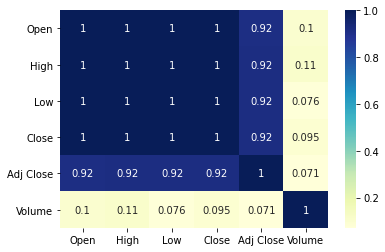

In [ ]:
corr_matrix=train.corr()
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True)

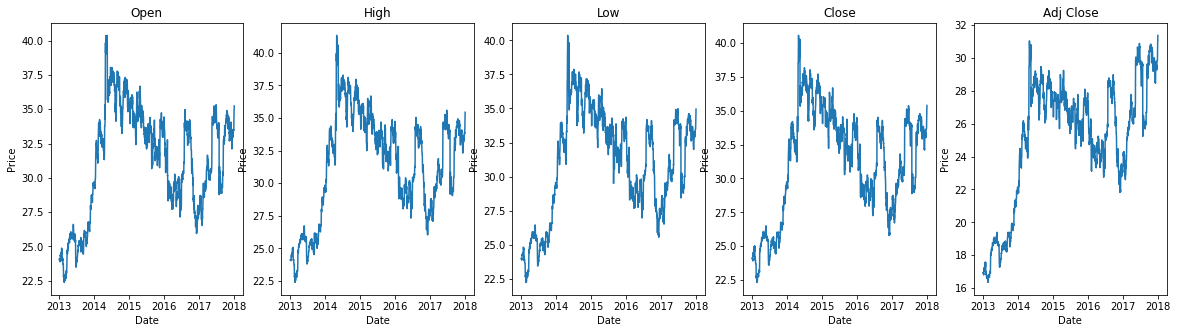

In [7]:
figure, axis = plt.subplots(ncols=5, figsize = (20,5))
axis[0].plot(train["Open"])
axis[0].set_title("Open")
axis[0].set_xlabel("Date")
axis[0].set_ylabel("Price")

axis[1].plot(train["High"])
axis[1].set_title("High")
axis[1].set_xlabel("Date")
axis[1].set_ylabel("Price")

axis[2].plot(train["Low"])
axis[2].set_title("Low")
axis[2].set_xlabel("Date")
axis[2].set_ylabel("Price")

axis[3].plot(train["Close"])
axis[3].set_title("Close")
axis[3].set_xlabel("Date")
axis[3].set_ylabel("Price")

axis[4].plot(train["Adj Close"])
axis[4].set_title("Adj Close")
axis[4].set_xlabel("Date")
axis[4].set_ylabel("Price")

plt.show()

Text(0, 0.5, 'Price')

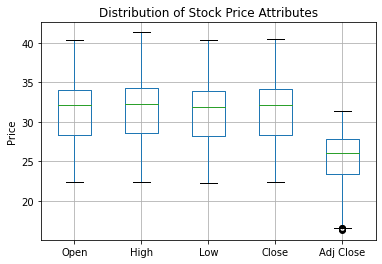

In [18]:
boxplot1 = train.boxplot(column=['Open','High','Low','Close','Adj Close'])
plt.title('Distribution of Stock Price Attributes')
plt.ylabel('Price')

Text(0, 0.5, 'Number of Shares (e7)')

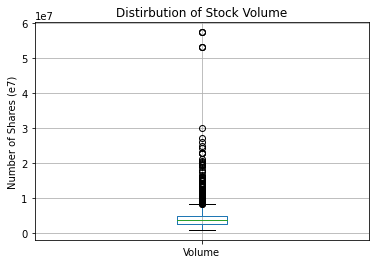

In [21]:
boxplot2 = train.boxplot('Volume')
plt.title('Distirbution of Stock Volume')
plt.ylabel("Number of Shares (e7)")

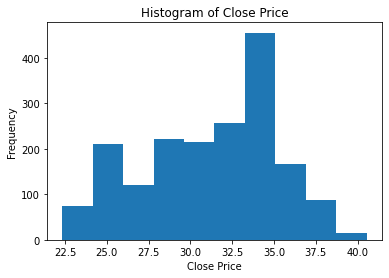

In [22]:
plt.hist(train['Close'])
plt.title('Histogram of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

The distribution of the close price is skewed right. 

**Testing for Stationarity**

In [ ]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [ ]:
def test_stationarity(timeseries):

  results = adfuller(timeseries, autolag='AIC')
  print('Results of Augmented Dickey Fuller Test')
  print('Test Statistic: ' + str(results[0]))
  print('p-value: ' + str(results[1]))
  print('No. of lags used: ' + str(results[2]))
  print('Number of observations used: ' + str(results[3]))

  for key, value in results[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

  if results[1] <= 0.05:
    print ("Reject null hypothesis. Data is stationary")
  else:
    print ("Fail to reject nyll hypothesis. Data is non-stationary")

It is important to determine whether the data is stationary. We apply the test_stationarity function to the close price. 

In [ ]:
test_stationarity(train['Close'])

Results of Augmented Dickey Fuller Test
Test Statistic: -2.2968065487610594
p-value: 0.1729999917965782
No. of lags used: 13
Number of observations used: 1812
Critial Values:
   1%, -3.4339640110318004
Critial Values:
   5%, -2.8631363845692475
Critial Values:
   10%, -2.567619862152732
Fail to reject nyll hypothesis. Data is non-stationary


The close price is not stationary. Need to apply differencing and transformations to make the close price stationary. 

The close price will undergo the following transformations separately:

* Log transformation
* Square root transformation
* First degree differencing


In [24]:
train['Close_log'] = np.log(train['Close'])
train['Close_sqrt'] = np.sqrt(train['Close'])
train['Close_diff'] = train['Close'].diff()

The transformations will be plotted to visually identify if the time-series data is stationary. 

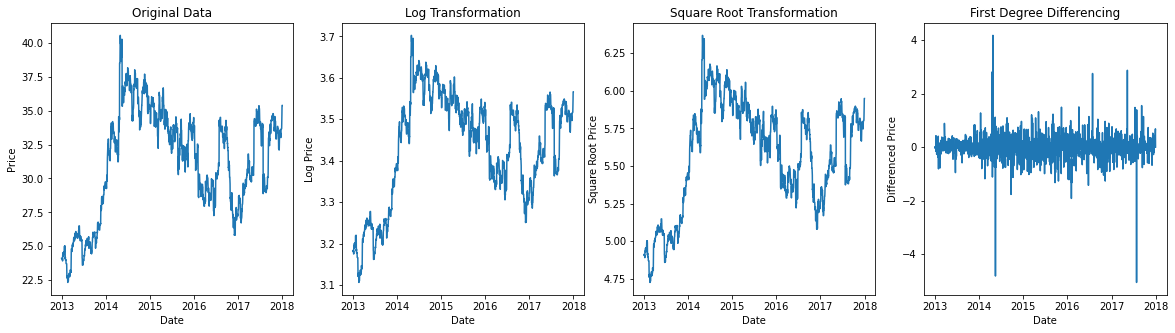

In [25]:
figure, axis = plt.subplots(ncols=4, figsize = (20,5))
axis[0].plot(train["Close"])
axis[0].set_title("Original Data")
axis[0].set_xlabel("Date")
axis[0].set_ylabel("Price")

axis[1].plot(train["Close_log"])
axis[1].set_title("Log Transformation")
axis[1].set_xlabel("Date")
axis[1].set_ylabel("Log Price")

axis[2].plot(train["Close_sqrt"])
axis[2].set_title("Square Root Transformation")
axis[2].set_xlabel("Date")
axis[2].set_ylabel("Square Root Price")

axis[3].plot(train["Close_diff"])
axis[3].set_title("First Degree Differencing")
axis[3].set_xlabel("Date")
axis[3].set_ylabel("Differenced Price")

plt.show()

Visually, the dataset looks stationary following first degree differencing. By applying the Augmented Dickey-Fuller test, we can determine if the dataset is stationary. A p-value of less than 0.05 indicates the dataset is stationary. 

In [ ]:
train = train.dropna()

In [ ]:
test_stationarity(train['Close_diff'])

Results of Augmented Dickey Fuller Test
Test Statistic: -12.260086806734092
p-value: 9.120941583839775e-23
No. of lags used: 12
Number of observations used: 1812
Critial Values:
   1%, -3.4339640110318004
Critial Values:
   5%, -2.8631363845692475
Critial Values:
   10%, -2.567619862152732
Reject null hypothesis. Data is stationary


**Testing for autocorrelation**

In [ ]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

Autocorrelation will be tested on the close price and the differenced close price for comparison. 

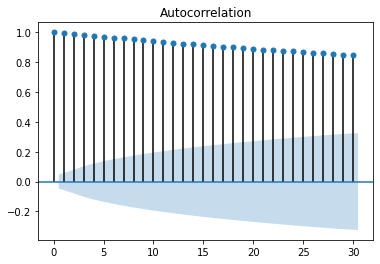

In [ ]:
plot_acf(train['Close'], lags=30);

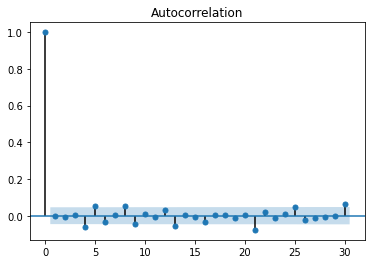

In [ ]:
plot_acf(train['Close_diff'], lags=30);

From the autocorrelation plot of the differenced close price, it is evident that the data is stationary. 

**Testing for Seasonality**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

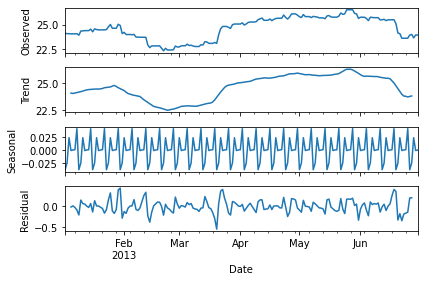

In [ ]:
output = seasonal_decompose(train['Close'][:180], model='additive')
output.plot();

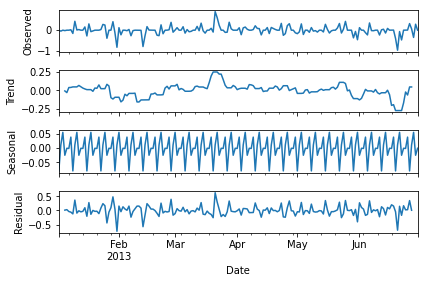

In [ ]:
decomposed = seasonal_decompose(train['Close_diff'][:180], model='additive')
decomposed.plot();

Prior to modeling, there are a few columns that will be dropped that will not be used to train the model.

In [ ]:
train_diff = train.drop(['Close_log','Close_sqrt','Close'],1)
train_diff.shape

(1825, 6)

In [ ]:
train_diff

,Open,High,Low,Adj Close,Volume,Close_diff
Date,,,,,,
2013-01-02,24.080000,24.120001,23.980000,16.935476,2812000,0.000000
2013-01-03,24.020000,24.115000,23.980000,16.903885,1941200,-0.045000
2013-01-04,23.959999,24.120001,23.959999,16.903885,1854800,0.000000
2013-01-05,23.995001,24.100000,23.975000,16.889841,1932200,-0.020000
2013-01-06,23.995001,24.100000,23.975000,16.889841,1932200,0.000000
...,...,...,...,...,...,...
2017-12-27,33.779999,33.799999,33.599998,29.914524,2566900,0.070000
2017-12-28,33.980000,34.200001,33.959999,30.260508,2445100,0.389999
2017-12-29,34.770000,34.950001,34.630001,30.783926,4096800,0.590000


In [ ]:
X_train = train_diff.drop('Close_diff', 1)
X_test = test.drop('Close',1)

y_train = train_diff['Close_diff'].values
y_test = test['Close'].values

**Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error, r2_score

In [ ]:
model = LinearRegression().fit(X_train,y_train)

In [ ]:
y_prediction = model.predict(X_test)

In [ ]:
predictions_diff = pd.Series(y_prediction, copy=True)

print('Total no of predictions: ', len(predictions_diff))
predictions_diff.head()

Total no of predictions:  730


0   -0.019162
1   -0.019162
2    0.079653
3   -0.053769
4    0.102965
dtype: float64

The cumulative sum (cumsum) function will be applied to the prediction to inverse the differencing applied to the train set. 

In [ ]:
predictions_diff_cumsum = predictions_diff.cumsum()
predictions_diff_cumsum.head()

0   -0.019162
1   -0.038323
2    0.041330
3   -0.012439
4    0.090525
dtype: float64

The values from predictions_diff_cumsum will be added to the last value in train['Close'] 

In [ ]:
last_price = train['Close'].iloc[-1] 
price_diff_rev = []

for i in predictions_diff_cumsum:
    close_pred = last_price + i
    price_diff_rev.append(close_pred)

In [ ]:
y_pred = np.array(price_diff_rev) 

The model will be evaluated with the R2, MAE, MSE and RMSE values. 

In [ ]:
print ("R2 of Linear Regresson:", r2_score(y_test,y_pred) )
print('MAE: ',metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 of Linear Regresson: 0.8168717734359878
MAE:  1.401585582492963
MSE:  3.0885890549710515
RMSE: 1.7574382080093318


The actual and predicted close price are plotted for comparison. 

Text(0.5, 1.0, 'Actual versus Predicted Close Price')

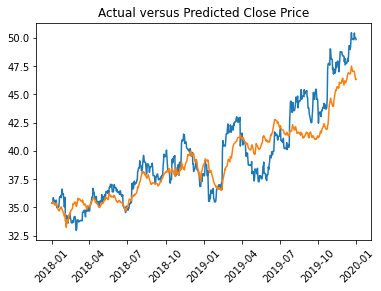

In [ ]:
forecast = pd.Series(y_pred, copy=True, index=test.index)
plt.plot(test['Close'])
plt.plot(forecast)
plt.xticks(rotation=45)
plt.title('Actual versus Predicted Close Price')

To determine if the best model was produced, feature selection will be completed to determine the attributes that best predict the Close price.

In [ ]:
X_train2 = train_diff.drop(['Volume','Close_diff'], 1)
X_test2 = test.drop(['Volume','Close'],1)

model = LinearRegression().fit(X_train2,y_train)
y_prediction2 = model.predict(X_test2)
predictions_diff2 = pd.Series(y_prediction2, copy=True)
predictions_diff_cumsum2 = predictions_diff2.cumsum()
last_price = train['Close'].iloc[-1] 
price_rev = []

for i in predictions_diff_cumsum2:
    close_pred = last_price + i
    price_rev.append(close_pred)

y_pred2 = np.array(price_rev) 

print ("R2 of Linear Regresson:", r2_score(y_test,y_pred2) )
print('MAE: ',metrics.mean_absolute_error(y_test, y_pred2))
print('MSE: ',metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

R2 of Linear Regresson: 0.7911992040126639
MAE:  1.4847568263273943
MSE:  3.5215753751118544
RMSE: 1.8765860958431548


In [ ]:
X_train3 = train_diff.drop(['Adj Close','Volume','Close_diff'], 1)
X_test3 = test.drop(['Adj Close','Volume','Close'],1)

model = LinearRegression().fit(X_train3,y_train)
y_prediction3 = model.predict(X_test3)
predictions_diff3 = pd.Series(y_prediction3, copy=True)
predictions_diff_cumsum3 = predictions_diff3.cumsum()
last_price = train['Close'].iloc[-1] 
price_diff_rev = []

for i in predictions_diff_cumsum3:
    close_pred = last_price + i
    price_diff_rev.append(close_pred)

y_pred3 = np.array(price_diff_rev) 

print ("R2 of Linear Regresson:", r2_score(y_test,y_pred3))
print('MAE: ',metrics.mean_absolute_error(y_test, y_pred3))
print('MSE: ',metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

R2 of Linear Regresson: 0.8017853773190732
MAE:  1.2997427384820621
MSE:  3.3430319598138665
RMSE: 1.8283960073829375


**KNN Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
mse_dict = {}
rmse = []

for k in range(1,50,2):
  Knn=KNeighborsRegressor(n_neighbors=k, metric='euclidean')
  Knn.fit(X_train,y_train)
  knn_y_prediction = Knn.predict(X_test)

  knn_predictions_diff = pd.Series(knn_y_prediction, copy=True)
  knn_predictions_diff_cumsum = knn_predictions_diff.cumsum()

  last_price = train['Close'].iloc[-1] 
  knn_price_diff_rev = []

  for i in knn_predictions_diff_cumsum:
    pred = last_price + i
    knn_price_diff_rev.append(pred)

  knn_y_pred = np.array(knn_price_diff_rev) 

  MSE = mean_squared_error(y_test, knn_y_pred)
  mse_dict[k] = MSE
  best_k = min(mse_dict, key=mse_dict.get)

  RMSE = np.sqrt(mean_squared_error(y_test, knn_y_pred))
  rmse.append(RMSE)

print('The k-value with the lowest MSE value is', best_k)
print('The lowest RMSE value is', min(rmse))

The k-value with the lowest MSE value is 33
The lowest RMSE value is 3.7075009092625146


For k=13, let's obtain the predicted values. 

In [ ]:
Knn=KNeighborsRegressor(n_neighbors=13, metric='euclidean')
Knn.fit(X_train,y_train)
knn_y_prediction = Knn.predict(X_test)

knn_predictions_diff = pd.Series(knn_y_prediction, copy=True)
knn_predictions_diff_cumsum = knn_predictions_diff.cumsum()

last_price = train['Close'].iloc[-1] 
knn_price_diff_rev = []

for i in knn_predictions_diff_cumsum:
  pred = last_price + i
  knn_price_diff_rev.append(pred)

knn13_y_pred = np.array(knn_price_diff_rev) 

Text(0.5, 1.0, 'KNN Regression')

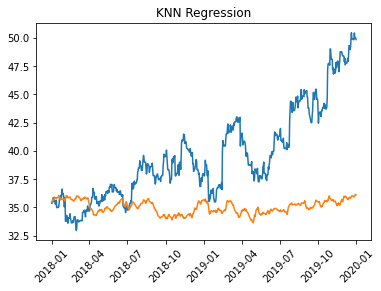

In [ ]:
knn_forecasted = pd.Series(knn13_y_pred, copy=True, index=test.index)
plt.plot(test['Close'])
plt.plot(knn_forecasted)
plt.xticks(rotation=45)
plt.title('KNN Regression')

**LSTM Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM